## Red or White Wine

In [3]:
from define_classes import *
from data_processing import *
from pca import *
from csv_clean import *
from polynomial_regression import *
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, accuracy_score, precision_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
from ordinal import *
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 

In [4]:
data = pd.read_csv('data.csv', index_col=0)
data['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [5]:
# Splitting Data

csv = 'data.csv'
y = 'type'
d = DataClean(csv)
df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv, y)

In [6]:
# Balancing data

smt = SMOTE(sampling_strategy='not majority', k_neighbors=3)
X_train_s, y_train_s = smt.fit_sample(np.asarray(X_train), np.asarray(y_train))

col = list(num_scale.columns)

X_train_smote = pd.DataFrame(X_train_s, columns=col)
y_train_smote = pd.DataFrame(y_train_s, columns=['type'])

smote_df = X_train_smote.join(y_train_smote)

smote_df.groupby('type').count().iloc[:,0]

type
0    3909
1    3909
Name: fixedacidity, dtype: int64

### Comparing Classification Models performance

In [19]:
LR = LogisticRegression(random_state=0, solver='lbfgs', class_weight='balanced').fit(X_train_smote, y_train_smote)
y_lr = LR.predict(X_test)

SVM = SVC(decision_function_shape="ovr", class_weight='balanced').fit(X_train_smote, y_train_smote)
y_sv = SVM.predict(X_test)

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0, class_weight='balanced').fit(X_train_smote, y_train_smote)
y_rf = RF.predict(X_test)

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train_smote, y_train_smote)
y_nn = NN.predict(X_test)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array w

In [23]:
model_predictions = [y_lr, y_sv, y_rf, y_nn]

In [26]:
names = ['y_lr', 'y_sv', 'y_rf', 'y_nn']

In [28]:
for y, n in zip(model_predictions, names):
    print('Accuracy_{}:'.format(n), round(accuracy_score(y_test, y), 3))
    print('Precision_{}:'.format(n), round(precision_score(y_test, y, average='weighted'),3))
    print('Recall_{}:'.format(n), round(recall_score(y_test,y, average='weighted'),3))
    print(classification_report(y_test, y))

Accuracy_y_lr: 0.992
Precision_y_lr: 0.992
Recall_y_lr: 0.992
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.97      0.99      0.98       311

    accuracy                           0.99      1300
   macro avg       0.98      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

Accuracy_y_sv: 0.997
Precision_y_sv: 0.997
Recall_y_sv: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      0.99      0.99       311

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Accuracy_y_rf: 0.996
Precision_y_rf: 0.996
Recall_y_rf: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       0.99      0.99      0.99       3

All of the classifiers perform well

Text(0.5, 257.44, 'Predicted label')

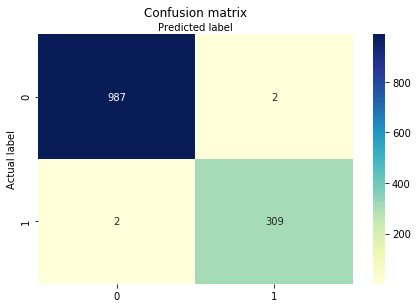

In [30]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_sv)
cnf_matrix

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

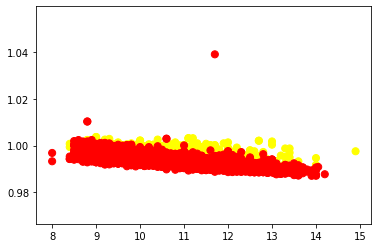

In [49]:
xfit = np.linspace(-1, 3.5)
plt.scatter(data['alcohol'], data['density'], c=data['type'], s=50, cmap='autumn')